# Credit Card Fraud Detection


# It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [412]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [413]:
df = pd.read_csv('C:/Users/HP/Downloads/CC.csv')


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

In [414]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

### The Entire data is clean, now we explore

In [416]:
df["Time"].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Since the Time is collected in seconds across two days, its best converted to hours for easier understanding

In [417]:
df["Time"] = df["Time"]/3600

In [418]:
df["Time"].describe()

count    284807.000000
mean         26.337183
std          13.191152
min           0.000000
25%          15.055972
50%          23.525556
75%          38.700139
max          47.997778
Name: Time, dtype: float64

<Axes: >

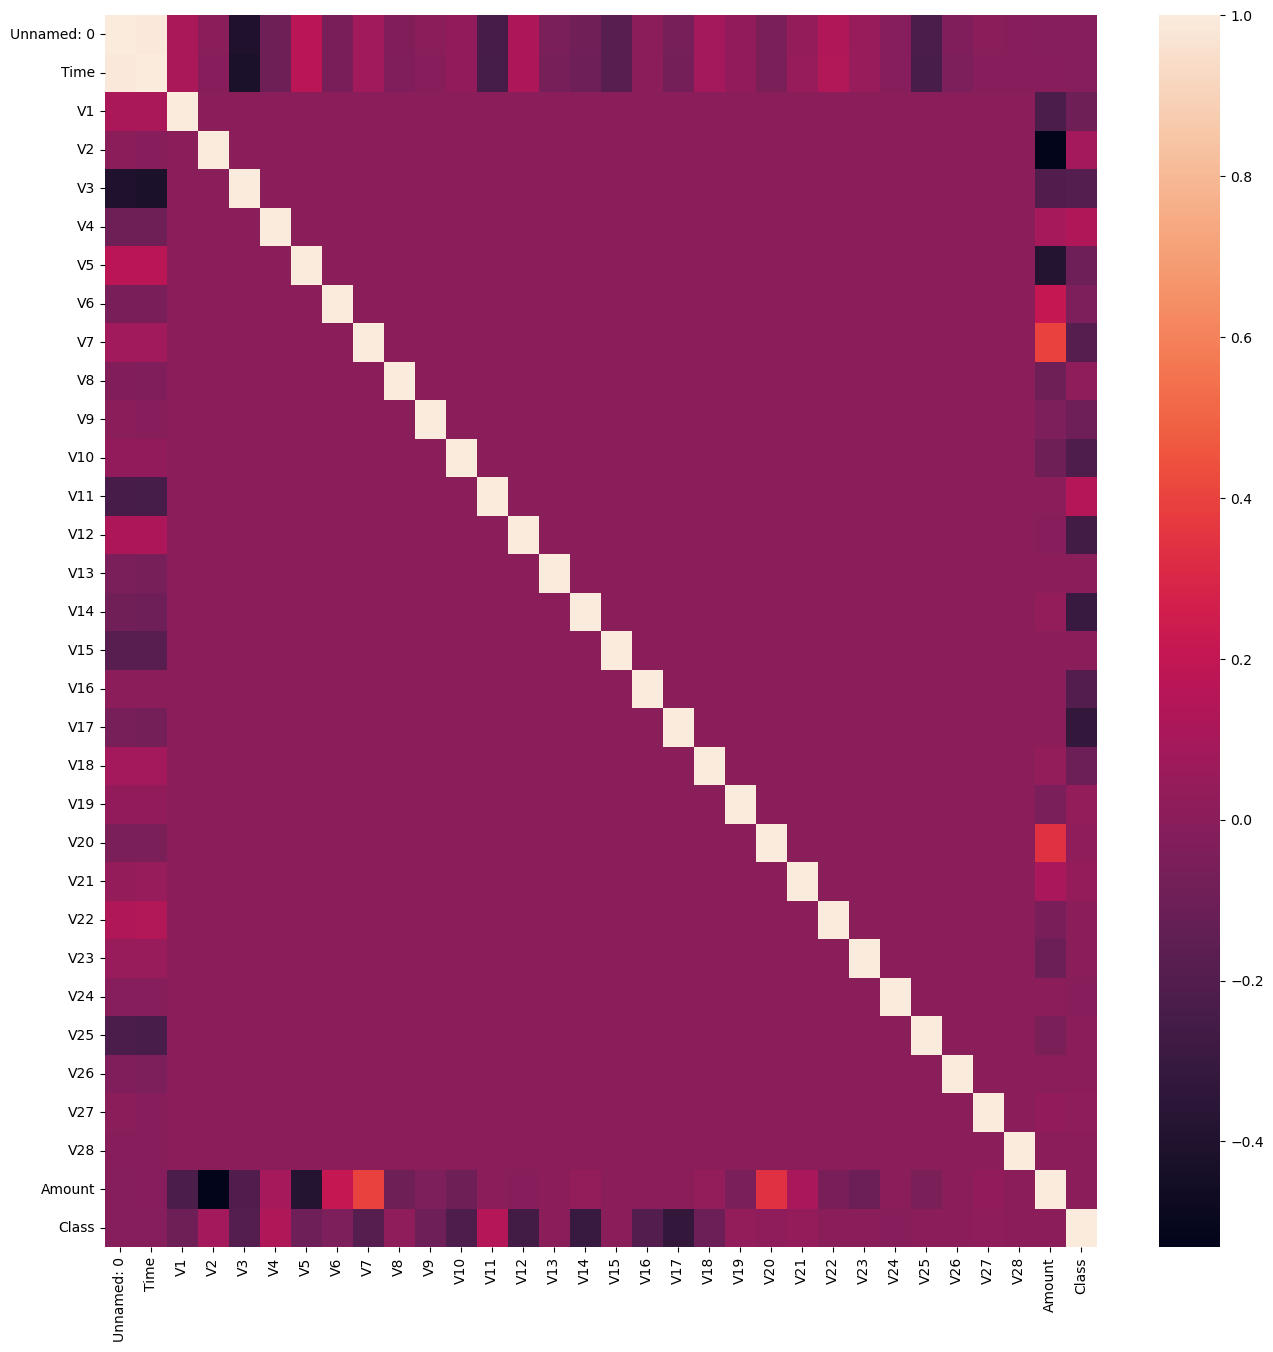

In [419]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), ax=ax)

### From the graph, we see that each column is independent and are completely uncorrelated 

#

## Outlier check

<Axes: >

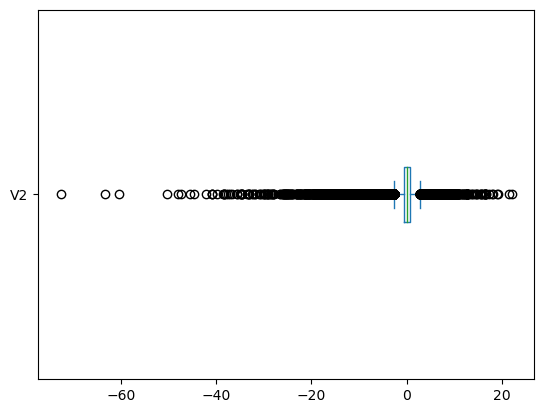

In [420]:
df['V2'].plot(kind="box", vert=False)

<Axes: >

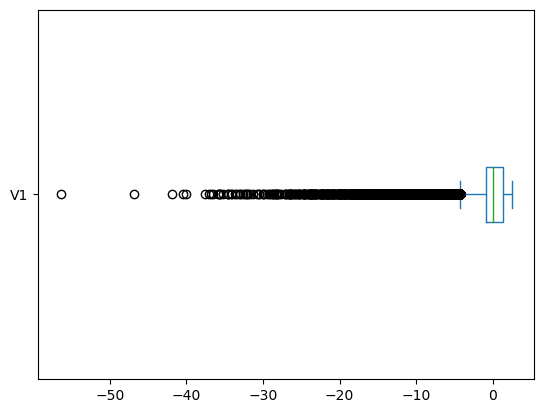

In [421]:
df['V1'].plot(kind="box", vert=False)

<Axes: >

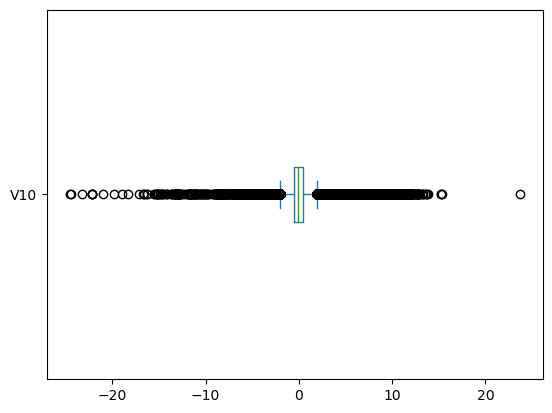

In [422]:
df['V10'].plot(kind="box", vert=False)

By running through the data a little bit, we see that we are not really dealing with a data with too much of outliers. and since we do not fully know the values of the columns, we can not shorten the data by trying to remove outlier data

In [423]:
df[["Amount", "Class"]]

,Amount,Class
0,149.62,0
1,2.69,0
2,378.66,0
3,123.50,0
4,69.99,0
...,...,...
284802,0.77,0
284803,24.79,0
284804,67.88,0
284805,10.00,0


putting out all credit card financial transactions within these two days, both fraudulent and non fraudulent

In [424]:
total_transaction_sum = df.groupby("Class")[["Amount"]].sum()

In [425]:
total_transaction_sum

,Amount
Class,
0,25102462.04
1,60127.97


<Axes: xlabel='Class'>

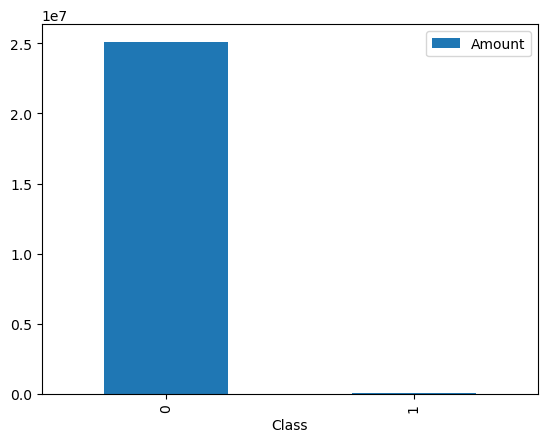

In [426]:
total_sum.plot(kind='bar')

In [427]:
total_credit_card_transaction = df["Amount"].sum()

In [428]:
total_credit_card_transaction

25162590.009999998

Sum of all credit card transaction is 25162590.009999998, which is the sumation of both fraudulent and non-fraudulent transactions

#

calculating fraud_transaction_sum_percentatage, which is the sum percentage of fraud transactions within the two days time interval

In [429]:
 fraud_transaction_sum_percentatage = (total_sum["Amount"][1]/total_credit_card_transaction)*100

In [430]:
fraud_transaction_sum_percentatage

0.2389577939953885

#

calculating non_fraud_transaction_sum_percentatage, which is the percentage of transactions done by the actual owners of the cards within the two days time interval

In [431]:
 non_fraud_transaction_sum_percentatage = (total_sum["Amount"][0]/total_credit_card_transaction)*100

In [432]:
non_fraud_transaction_sum_percentatage

99.76104220600462

## Here, we realize that 0.2% of all financial transactions carried out within the two days were fraudulent, while 99.7% were non fraudulent transactions

#

Now, Looking at the frequency of the transactions, which is the number of times both fraudulent and non- fraudelent transactions were carried out

In [433]:
total_number_of_transaction = df["Class"].count()

In [434]:
total_number_of_transaction

284807

In [435]:
frequency = df["Class"].value_counts()

In [436]:
frequency

Class
0    284315
1       492
Name: count, dtype: int64

492 fraudulent and 284315 non-fraudulent transactions were carried out 

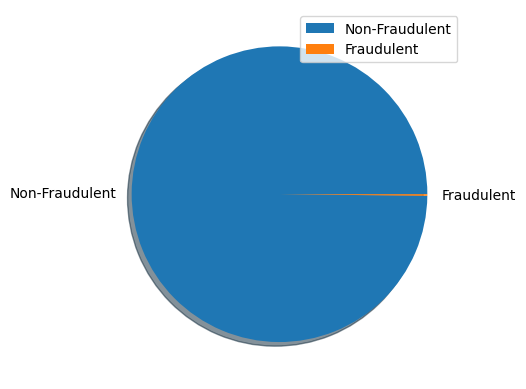

In [437]:
plt.pie(frequency, labels= ["Non-Fraudulent","Fraudulent"],shadow=True)
plt.legend()

Fraudulent transactions were carried out 492 times while non-fraudulent transactions were carried out 284,315 times

In [438]:
Fraud_transaction_freq_percentage  = (df["Class"].value_counts()[1]/total_number_of_transaction) * 100

In [439]:
Fraud_transaction_freq_percentage

0.1727485630620034

approximately o.17 percent times of transactions carried out were fraudulent

#

In [440]:
Non_Fraud_transaction_freq_percentage  = (df["Class"].value_counts()[0]/total_number_of_transaction) * 100

In [441]:
Non_Fraud_transaction_freq_percentage

99.82725143693798

approximately 99.8 percent times of all transactions were non-fraudulent

#

## Comparing Nature of Transactions

In [468]:
First_ten_fraud_transactions = df[df["Class"] == 1][["Amount","Class"]].head(10)

In [470]:
First_ten_fraud_transactions

,Amount,Class
541,0.00,1
623,529.00,1
4920,239.93,1
6108,59.00,1
6329,1.00,1
6331,1.00,1
6334,1.00,1
6336,1.00,1
6338,1.00,1
6427,1.00,1


In [471]:
First_ten_non_fraud_transactions = df[df["Class"] == 0][["Amount","Class"]].head(10)

In [472]:
First_ten_non_fraud_transactions

,Amount,Class
0,149.62,0
1,2.69,0
2,378.66,0
3,123.50,0
4,69.99,0
5,3.67,0
6,4.99,0
7,40.80,0
8,93.20,0
9,3.68,0


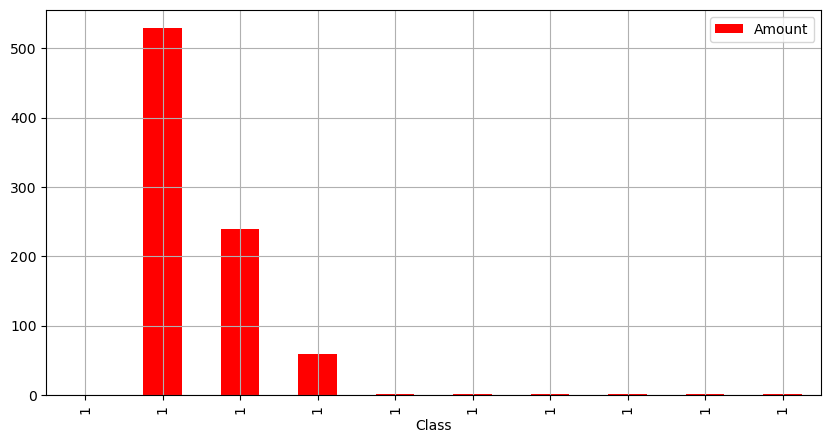

In [476]:
fig, ax = plt.subplots(figsize=(10,5))
First_ten_fraud_transactions.plot(kind='bar', x='Class', y='Amount', color='r', ax=ax)
plt.grid()

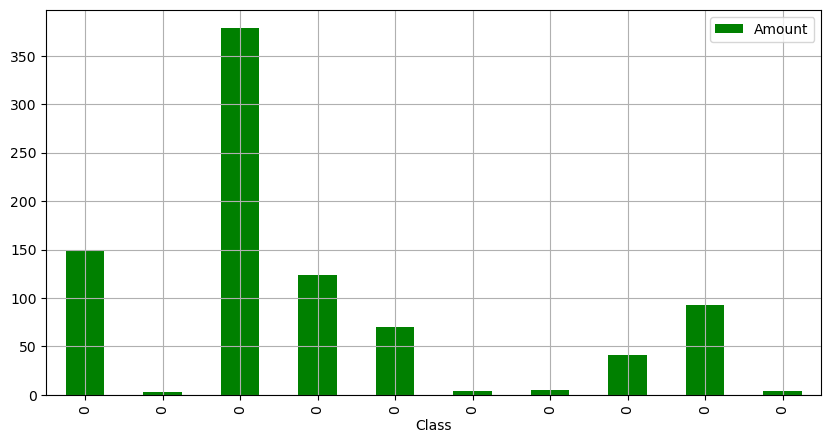

In [477]:
fig, ax = plt.subplots(figsize=(10,5))
First_ten_non_fraud_transactions.plot(kind='bar', x='Class', y='Amount', color='g', ax=ax)
plt.grid()

In [478]:
Last_ten_fraud_transactions = df[df["Class"] == 1][["Amount","Class"]].tail(10)

In [479]:
Last_ten_fraud_transactions

,Amount,Class
274382,0.00,1
274475,39.90,1
275992,634.30,1
276071,19.95,1
276864,349.08,1
279863,390.00,1
280143,0.76,1
280149,77.89,1
281144,245.00,1
281674,42.53,1


In [481]:
Last_ten_non_fraud_transactions = df[df["Class"] == 0][["Amount","Class"]].tail(10)

In [482]:
Last_ten_non_fraud_transactions

,Amount,Class
284797,5.49,0
284798,24.05,0
284799,79.99,0
284800,2.68,0
284801,2.69,0
284802,0.77,0
284803,24.79,0
284804,67.88,0
284805,10.00,0
284806,217.00,0


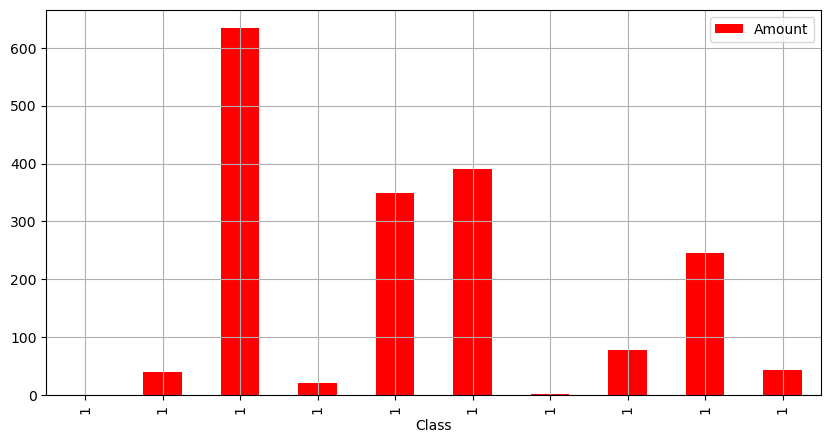

In [483]:
fig, ax = plt.subplots(figsize=(10,5))
Last_ten_fraud_transactions.plot(kind='bar', x='Class', y='Amount', color='r', ax=ax)
plt.grid()

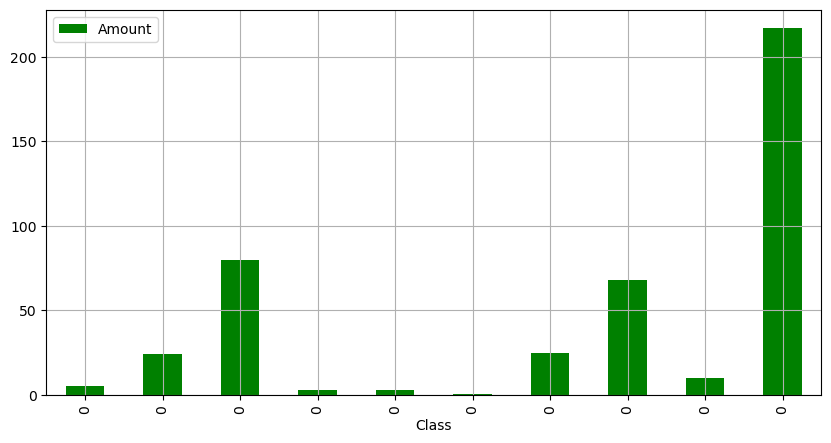

In [484]:
fig, ax = plt.subplots(figsize=(10,5))
Last_ten_non_fraud_transactions.plot(kind='bar', x='Class', y='Amount', color='g', ax=ax)
plt.grid()

#

# Building Model

Since the Data is largely imbalance, we are going to have to resample using the undersampling technique. To avoid bias in the model

In [337]:
 New_df0 = df[df["Class"] == 0].sample(500, random_state=42) 

we taking 500 samples from the majority class

In [338]:
New_df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 138028 to 235953
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   Time        500 non-null    float64
 2   V1          500 non-null    float64
 3   V2          500 non-null    float64
 4   V3          500 non-null    float64
 5   V4          500 non-null    float64
 6   V5          500 non-null    float64
 7   V6          500 non-null    float64
 8   V7          500 non-null    float64
 9   V8          500 non-null    float64
 10  V9          500 non-null    float64
 11  V10         500 non-null    float64
 12  V11         500 non-null    float64
 13  V12         500 non-null    float64
 14  V13         500 non-null    float64
 15  V14         500 non-null    float64
 16  V15         500 non-null    float64
 17  V16         500 non-null    float64
 18  V17         500 non-null    float64
 19  V18         500 non-null  

#

In [339]:
New_df1 = df[df["Class"]==1]

Since the minority class has only 492 entries we keep them all

In [340]:
New_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 541 to 281674
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  492 non-null    int64  
 1   Time        492 non-null    float64
 2   V1          492 non-null    float64
 3   V2          492 non-null    float64
 4   V3          492 non-null    float64
 5   V4          492 non-null    float64
 6   V5          492 non-null    float64
 7   V6          492 non-null    float64
 8   V7          492 non-null    float64
 9   V8          492 non-null    float64
 10  V9          492 non-null    float64
 11  V10         492 non-null    float64
 12  V11         492 non-null    float64
 13  V12         492 non-null    float64
 14  V13         492 non-null    float64
 15  V14         492 non-null    float64
 16  V15         492 non-null    float64
 17  V16         492 non-null    float64
 18  V17         492 non-null    float64
 19  V18         492 non-null    f

In [341]:
New_df = pd.concat([New_df0, New_df1]) # we combine the two dataframes

In [342]:
New_df = New_df.drop(columns=["Unnamed: 0"]).reset_index(drop=True) #reset indet

In [343]:
New_df= New_df.sample(frac=1) #shuffle the data set

In [344]:
New_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
984,46.341944,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
775,23.690278,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
257,9.452222,0.295196,-0.665059,-0.166118,2.980106,-0.450200,-0.961072,1.240133,-0.475645,-1.249510,...,0.309112,-0.154699,-0.455862,0.971883,0.511751,-0.016624,-0.122369,0.097883,467.50,0
266,36.576944,2.058497,-1.364157,-0.226862,-0.647026,-1.357569,0.088211,-1.393876,0.207510,0.879733,...,-0.041127,-0.064040,0.344247,0.640258,-0.444159,-0.392841,0.021828,-0.030927,43.48,0
863,34.312500,-5.904921,4.439911,-8.631802,7.788684,-4.989580,-1.200144,-7.674060,4.125761,-5.315778,...,1.775030,1.266441,-0.199410,0.014960,-0.000019,0.544210,-1.167566,-1.206354,45.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,37.627500,2.110020,-0.567223,-1.504956,-0.670864,-0.094790,-0.612758,-0.123264,-0.229933,-1.171965,...,-0.458905,-0.899242,0.362032,0.691103,-0.342511,0.350469,-0.079475,-0.059706,30.00,0
665,14.113333,-9.169790,7.092197,-12.354037,4.243069,-7.176438,-3.386618,-8.058012,6.442909,-2.412987,...,0.926157,-0.817706,-0.150434,-0.039383,0.485640,-0.264325,1.159690,0.232758,99.99,1
29,43.198889,1.911465,0.450070,-0.574955,3.920566,0.291037,-0.052380,0.136529,-0.100840,-0.615584,...,0.068425,0.370269,0.060278,-0.115442,0.148696,0.104013,-0.027900,-0.051377,11.37,0
499,41.281389,2.037607,0.019037,-1.319619,0.330859,0.133902,-1.049289,0.247531,-0.346221,0.458602,...,0.280132,0.957579,0.072367,1.141207,0.244270,-0.164628,-0.017974,-0.045952,8.49,0


#

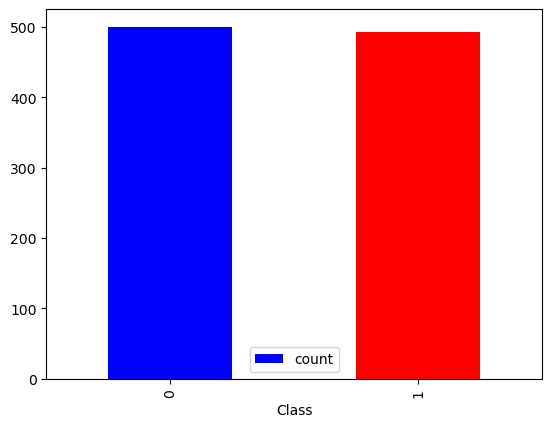

In [345]:
New_df["Class"].value_counts().plot(kind="bar", color=["b","r"])
plt.legend()

### Model Selection

Due to the nature of the problem we are faced with, we are going to be working with a couple of classification models, evaluating their performance and see which is better.

### Firstly, Logistics Regression.

its Simple and yet efficient, its good for establishing baseline and also very straight forward 

In [346]:
X = New_df.drop(columns="Class")

In [347]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
984,46.341944,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,0.033804,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30
775,23.690278,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92
257,9.452222,0.295196,-0.665059,-0.166118,2.980106,-0.450200,-0.961072,1.240133,-0.475645,-1.249510,...,0.806711,0.309112,-0.154699,-0.455862,0.971883,0.511751,-0.016624,-0.122369,0.097883,467.50
266,36.576944,2.058497,-1.364157,-0.226862,-0.647026,-1.357569,0.088211,-1.393876,0.207510,0.879733,...,-0.052779,-0.041127,-0.064040,0.344247,0.640258,-0.444159,-0.392841,0.021828,-0.030927,43.48
863,34.312500,-5.904921,4.439911,-8.631802,7.788684,-4.989580,-1.200144,-7.674060,4.125761,-5.315778,...,-0.505608,1.775030,1.266441,-0.199410,0.014960,-0.000019,0.544210,-1.167566,-1.206354,45.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,37.627500,2.110020,-0.567223,-1.504956,-0.670864,-0.094790,-0.612758,-0.123264,-0.229933,-1.171965,...,-0.493764,-0.458905,-0.899242,0.362032,0.691103,-0.342511,0.350469,-0.079475,-0.059706,30.00
665,14.113333,-9.169790,7.092197,-12.354037,4.243069,-7.176438,-3.386618,-8.058012,6.442909,-2.412987,...,0.816652,0.926157,-0.817706,-0.150434,-0.039383,0.485640,-0.264325,1.159690,0.232758,99.99
29,43.198889,1.911465,0.450070,-0.574955,3.920566,0.291037,-0.052380,0.136529,-0.100840,-0.615584,...,-0.300017,0.068425,0.370269,0.060278,-0.115442,0.148696,0.104013,-0.027900,-0.051377,11.37
499,41.281389,2.037607,0.019037,-1.319619,0.330859,0.133902,-1.049289,0.247531,-0.346221,0.458602,...,-0.176971,0.280132,0.957579,0.072367,1.141207,0.244270,-0.164628,-0.017974,-0.045952,8.49


In [348]:
y=New_df["Class"]

In [349]:
y

984    1
775    1
257    0
266    0
863    1
      ..
281    0
665    1
29     0
499    0
615    1
Name: Class, Length: 992, dtype: int64

In [350]:
from sklearn.model_selection import train_test_split

In [351]:
 X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [352]:
from sklearn.linear_model import LogisticRegression

In [353]:
log_reg_model = LogisticRegression()

In [354]:
log_reg_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [355]:
log_reg_model.coef_

array([[-0.07536278,  0.20554064, -0.17444068, -0.39295679,  0.79021402,
         0.0875374 , -0.07561088,  0.08606404, -0.82907553, -0.43691599,
        -0.7022402 , -0.08911996, -0.57734237, -0.50312115, -1.18243475,
        -0.08430587, -0.32871767, -0.5981365 ,  0.1208182 , -0.1473606 ,
        -0.25826653, -0.02715141,  0.71286644, -0.51040304, -0.02898985,
        -0.54262161, -0.22706421, -0.08583103,  0.32183818,  0.00148531]])

In [356]:
log_reg_model.intercept_

array([-1.31341103])

In [357]:
predictions = log_reg_model.predict(X_test)

In [358]:
from sklearn.metrics import r2_score, accuracy_score

In [359]:
score = accuracy_score(y_test, predictions)

In [360]:
score.round(2)

0.93

In [ ]:
from sklearn.metrics import classification_report

In [361]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       158
           1       0.92      0.92      0.92       140

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



In [362]:
from sklearn.metrics import PrecisionRecallDisplay

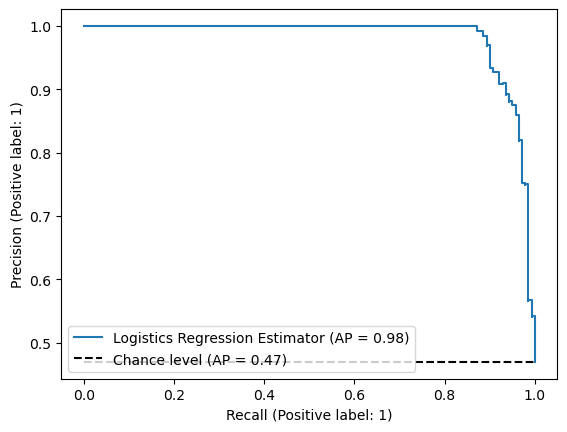

In [363]:
PrecisionRecallDisplay.from_estimator(log_reg_model, X_test, y_test, name= 'Logistics Regression Estimator', plot_chance_level=True)

### From the graph we can see that the model generalised pretty well

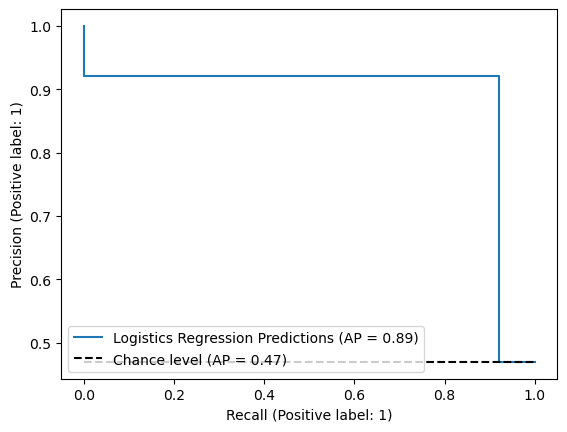

In [364]:
PrecisionRecallDisplay.from_predictions(y_test, predictions, name = 'Logistics Regression Predictions', plot_chance_level=True )

### the predictions did okay too, but hopefully we will see a better performing model

#

## Estimating Using SVM

In [366]:
from sklearn import svm

In [367]:
clf = svm.SVC(kernel= "linear")

In [368]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [369]:
svc_pred = clf.predict(X_test)

In [370]:
accuracy_score(y_test, svc_pred)

0.9429530201342282

In [371]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       158
           1       0.96      0.92      0.94       140

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



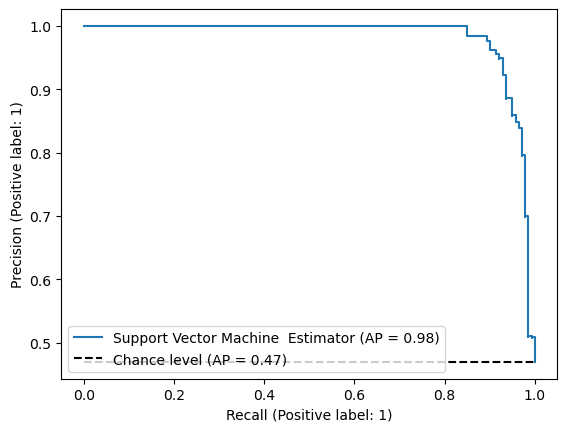

In [372]:
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, name= 'Support Vector Machine  Estimator', plot_chance_level=True)

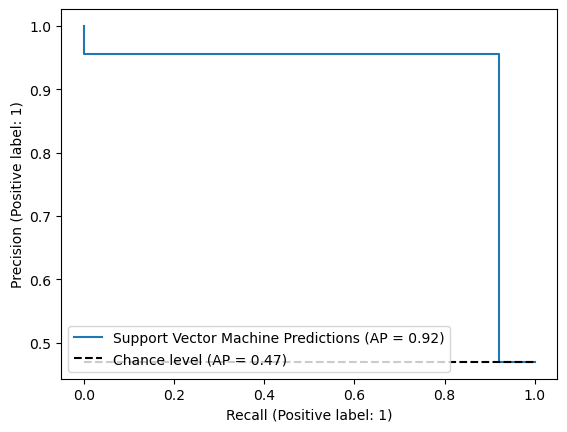

In [373]:
PrecisionRecallDisplay.from_predictions(y_test, svc_pred, name = 'Support Vector Machine Predictions', plot_chance_level=True )

### Here we see that SVM classifier has a better accuracy than logistics regression and also generalizes better from the PR graph

#

## Estimation Using Naive Baye 

In [379]:
from sklearn.naive_bayes import GaussianNB

In [380]:
gnb = GaussianNB()

In [381]:
gnb.fit(X_train, y_train)

GaussianNB()

In [382]:
gnb_pred = gnb.predict(X_test)

In [384]:
accuracy_score(y_test, gnb_pred)

0.912751677852349

In [385]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       158
           1       0.95      0.86      0.90       140

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298



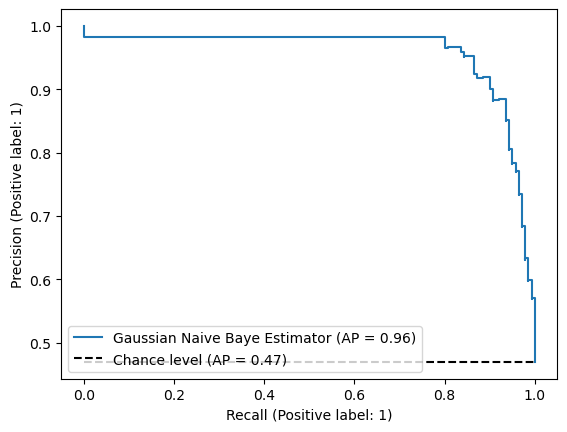

In [386]:
PrecisionRecallDisplay.from_estimator(gnb, X_test, y_test, name="Gaussian Naive Baye Estimator", plot_chance_level=True)

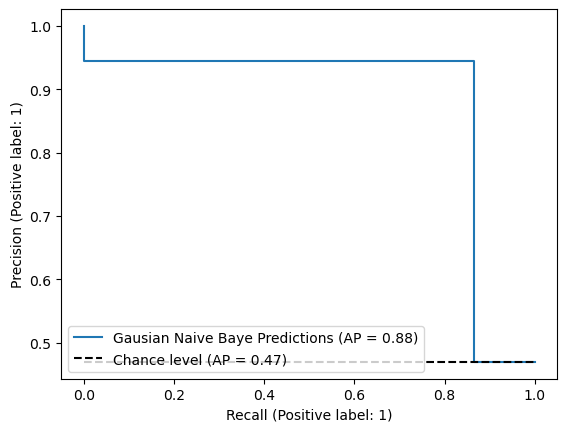

In [387]:
PrecisionRecallDisplay.from_predictions(y_test, gnb_pred, name='Gausian Naive Baye Predictions', plot_chance_level=True)

### Even though Naive Baye is not a perfect used case for this kind of situation, but due to its probabilistic properties we can see from the graph that it is able to predict fraudulent transactions better than other models 

#

## Estimating Using Artificial Neural Network

In [401]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [402]:
NN_model = Sequential()

In [403]:
NN_model.add(Dense(20, activation='relu', input_dim=30))

In [404]:
NN_model.add(Dense(10, activation='relu'))

In [405]:
NN_model.add(Dense(1, activation='sigmoid'))


In [406]:
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [407]:
NN_model.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
70/70 [==============================] - 2s 3ms/step - loss: 0.7639 - accuracy: 0.6816
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8790
Epoch 3/10
70/70 [==============================] - 0s 3ms/step - loss: 0.3026 - accuracy: 0.9063
Epoch 4/10
70/70 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.9063
Epoch 5/10
70/70 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.9294
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9236
Epoch 7/10
70/70 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.9323
Epoch 8/10
70/70 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.9294
Epoch 9/10
70/70 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.9323
Epoch 10/10
70/70 [==============================] - 0s 3ms/step - loss: 0.1883 - accuracy: 0.9424


In [408]:
NN_pred = NN_model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [409]:
NN_loss, NN_acuracy = NN_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9295


In [410]:
NN_acuracy

0.9295302033424377

#### The ANN model did good, but we've seen better performing models

#

#

# Summary, Conclusion And Recomendation

#### From the various analysis done, 
#### Logistics Regression has 93% precision Predicting Non-Fraudulent transactions and 92% precision predicting Fraudulent transactions with a total accuracy of 93%

#### SVM(Support Vector machine ) has 93% precision Predicting Non-Fraudulent transactions and 96% precision predicting Fraudulent transactions with a total accuracy of 94%

#### Naive Baiye has 89% precision Predicting Non-Fraudulent transactions and 95% precision predicting Fraudulent transactions with a total accuracy of 91%

#### Artificial Neural Network has an acuracy of 92%

#### Eventhough Naive Baiye performed Poorly in this test, it is evident that the naive-Baiye model has a thing for figuring out illogical, incosistent or fishy pattern of events.



### My Recomendation is ... Companies adopt the SVM or Naive Baiye Model in Identifying or Recognizing Fraudulent patterns so that customers are not charged for fraudulent transactions.